**DATA 698**


---


E-Commerce website traffic analysis using Graph Neural Networks

Data Exploration on the dataset from DataCo and related files


Importing the libraries

In [78]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 54.8 gigabytes of available RAM

You are using a high-RAM runtime!


In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')


Importing the dataset

In [80]:
# Access Log data
access_log_url = 'https://raw.githubusercontent.com/baruab/baruab/refs/heads/main/DATA_698/DataCo/tokenized_access_logs.csv'
df_ac_log = pd.read_csv(access_log_url)
df_ac_log.head()


,Product,Category,Date,Month,Hour,Department,ip,url
0,adidas Brazuca 2017 Official Match Ball,baseball & softball,9/1/2017 6:00,Sep,6,fitness,37.97.182.65,/department/fitness/category/baseball%20&%20so...
1,The North Face Women's Recon Backpack,hunting & shooting,9/1/2017 6:00,Sep,6,fan shop,206.56.112.1,/department/fan%20shop/category/hunting%20&%20...
2,adidas Kids' RG III Mid Football Cleat,featured shops,9/1/2017 6:00,Sep,6,apparel,215.143.180.0,/department/apparel/category/featured%20shops/...
3,Under Armour Men's Compression EV SL Slide,electronics,9/1/2017 6:00,Sep,6,footwear,206.56.112.1,/department/footwear/category/electronics/prod...
4,Pelican Sunstream 100 Kayak,water sports,9/1/2017 6:01,Sep,6,fan shop,136.108.56.242,/department/fan%20shop/category/water%20sports...


In [81]:
# Supply Chain data
#sc_url = 'https://raw.githubusercontent.com/baruab/baruab/refs/heads/main/DATA_698/DataCo/DataCoSupplyChainDataset.csv'
#df_sc = pd.read_csv(sc_url , encoding='latin1')
#df_sc.head()



In [82]:
df_ac_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469977 entries, 0 to 469976
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Product     469977 non-null  object
 1   Category    469977 non-null  object
 2   Date        469977 non-null  object
 3   Month       469977 non-null  object
 4   Hour        469977 non-null  int64 
 5   Department  469977 non-null  object
 6   ip          469977 non-null  object
 7   url         469977 non-null  object
dtypes: int64(1), object(7)
memory usage: 28.7+ MB


In [83]:
#df_sc.info()

In [147]:
#df_ac_log.describe()

print(min(df_ac_log['Date']))
print(max(df_ac_log['Date']))

1/1/2018 10:01
9/9/2017 9:59


In [85]:
#df_sc.describe()

Check for Duplication

In [86]:
df_ac_log.duplicated().sum()

3249

Unique values in Access Log

In [87]:
df_ac_log.nunique()

,0
Product,76
Category,33
Date,160815
Month,5
Hour,24
Department,6
ip,3340
url,152


In [88]:
#df_sc.nunique()

Check for missing values in dataset

In [89]:
df_ac_log.isnull().sum()

,0
Product,0
Category,0
Date,0
Month,0
Hour,0
Department,0
ip,0
url,0


In [90]:
#df_sc.isnull().sum()

**Feature Engineering**

Add geo features to the data based on IP address information. Map the IP address with Country, State and City.

In [91]:
#!pip install ipinfo
#import ipinfo
#import json
#import requests

#json_url = 'https://raw.githubusercontent.com/baruab/baruab/refs/heads/main/DATA_698/DataCo/iso-3166-2.json'

#try:
#    response = requests.get(json_url)  # Fetch the JSON data from the URL
#    response.raise_for_status()  # Raise an exception for bad responses
#    state_abbr_data = json.loads(response.text)  # Load JSON from the response text
#except requests.exceptions.RequestException as e:
#    print(f"Error fetching JSON data: {e}")


#access_token = '8f8f1378474839'  # Optional, but added for more data  8f8f1378474839
#handler = ipinfo.getHandler(access_token)
#count = 0 # Added to tally the number

#def get_state_abbr(country_code, state_name):
#    country_data = state_abbr_data.get(country_code, {})
#    divisions = country_data.get("divisions", {})

#   for abbr, full_name in divisions.items():
#        if full_name.lower() == state_name.lower():
#            return abbr.split('-')[-1]

#    return " - "

#def get_location(ip):
#    global count
#    try:
#        count += 1
#        details = handler.getDetails(ip)

#        city = details.city if details.city else None
#        country = details.country if details.country else None  # ISO country code
#        country_name = details.country_name if details.country_name else None
#        state = details.region if details.region else None

#        if state and country:
#            state_abv = get_state_abbr(country, state)

 #       print(f"Processing IP {count}: {ip} -> City: {city}, Country: {country}, State: {state}")
 #       return city, country_name, state, country, state_abv
 #   except Exception as e:
 #       print(f"Exception for IP {ip}: {e}")
 #       return None, None, None, None, None


## In the interest of saving time, calling the API multiple times, as the information is of static nature
##   the generated file with added columns is saved and read directly to save compute time

# df_ac_log['City'], df_ac_log['Country'], df_ac_log['State'],  df_ac_log['Country_Code'], df_ac_log['State_Code'] = zip(*df_ac_log['ip'].apply(get_location))
#output_file = 'access_logs_with_state_cntry.csv'
#df_ac_log.to_csv(output_file, index=False)
#df_ac_log.head()

#access_log_location_url = 'https://raw.githubusercontent.com/baruab/baruab/refs/heads/main/DATA_698/access_logs_with_location_codes.csv'
#df_ac_log = pd.read_csv(access_log_location_url)




In [92]:

## In the interest of saving time, calling the API multiple times, as the information is of static nature
##   the generated file with added columns is saved and read directly to save compute time
## Note: The file was truncated in size >100 KB, filtered for US only to upload in Github

access_log_location_url = 'https://raw.githubusercontent.com/baruab/baruab/refs/heads/main/DATA_698/tokenized_access_logs_usa.csv'
df_ac_log = pd.read_csv(access_log_location_url)


Feature Engineering

Let's split the date time string into date & time represented as numbers to create indexes, if needed

In [93]:
df_ac_log['date_id'] = df_ac_log['Date'].str.split('/').str[1]
df_ac_log['month_id'] = df_ac_log['Date'].str.split('/').str[0]
df_ac_log['year_id'] = df_ac_log['Date'].str.split('/').str[2].str.split(' ').str[0]

df_ac_log['time'] = df_ac_log['Date'].str.split(' ').str[1]

#df_ac_log.head()


In [94]:
print(len(df_ac_log))

193571


Converting Date to add Day Of the Week in Access Log

In [95]:
df_ac_log['Dt'] = df_ac_log['Date'].str.split(' ').str[0]

# Convert the 'date' column to datetime
df_ac_log['date'] = pd.to_datetime(df_ac_log['Dt'])

# Extract the day of the week
df_ac_log['day_of_week'] = df_ac_log['date'].dt.day_name()
df_ac_log['weekday'] = df_ac_log['date'].dt.weekday
#df_ac_log.head()


**Data Sorting and Grouping**

Sort the access log by IP address, date to understand the sequence of web clicks

In [96]:
df_ac_log.sort_values(['ip'], ascending=[True])  #, 'date', 'time'

#df_ac_log.head(30)

,Product,Category,Date,Month,Hour,Department,ip,url,City,Country,...,Country_Code,State_Code,date_id,month_id,year_id,time,Dt,date,day_of_week,weekday
120786,Nike Men's Free 5.0+ Running Shoe,cardio equipment,9/14/2017 22:37,Sep,22,footwear,100.13.150.163,/department/footwear/category/cardio%20equipme...,Ashburn,United States,...,US,VA,14,9,2017,22:37,9/14/2017,2017-09-14,Thursday,3
120898,adidas Kids' F5 Messi FG Soccer Cleat,baseball & softball,9/14/2017 22:39,Sep,22,fitness,100.13.150.163,/department/fitness/category/baseball%20&%20so...,Ashburn,United States,...,US,VA,14,9,2017,22:39,9/14/2017,2017-09-14,Thursday,3
121232,Diamondback Boys' Insight 24 Performance Hybr,basketball,11/26/2017 6:27,Nov,6,fitness,100.13.150.163,/department/fitness/category/basketball/produc...,Ashburn,United States,...,US,VA,26,11,2017,6:27,11/26/2017,2017-11-26,Sunday,6
121241,adidas Kids' RG III Mid Football Cleat,featured shops,11/26/2017 6:37,Nov,6,apparel,100.13.150.163,/department/apparel/category/featured%20shops/...,Ashburn,United States,...,US,VA,26,11,2017,6:37,11/26/2017,2017-11-26,Sunday,6
175677,Nike Men's Free TR 5.0 TB Training Shoe,as seen on tv!,1/26/2018 7:01,Jan,7,footwear,100.13.150.163,/department/footwear/category/as%20seen%20on%2...,Ashburn,United States,...,US,VA,26,1,2018,7:01,1/26/2018,2018-01-26,Friday,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174454,Polar FT4 Heart Rate Monitor,kids' golf clubs,1/25/2018 13:26,Jan,13,outdoors,99.99.191.106,/department/outdoors/category/kids'%20golf%20c...,Dallas,United States,...,US,TX,25,1,2018,13:26,1/25/2018,2018-01-25,Thursday,3
117277,Merrell Women's Grassbow Sport Hiking Shoe,men's golf clubs,9/14/2017 22:17,Sep,22,outdoors,99.99.191.106,/department/outdoors/category/men's%20golf%20c...,Dallas,United States,...,US,TX,14,9,2017,22:17,9/14/2017,2017-09-14,Thursday,3
118981,adidas Youth Germany Black/Red Away Match Soc,girls' apparel,11/25/2017 14:03,Nov,14,golf,99.99.191.106,/department/golf/category/girls'%20apparel/pro...,Dallas,United States,...,US,TX,25,11,2017,14:03,11/25/2017,2017-11-25,Saturday,5
118772,Glove It Women's Mod Oval Golf Glove,golf balls,11/25/2017 10:29,Nov,10,outdoors,99.99.191.106,/department/outdoors/category/golf%20balls/pro...,Dallas,United States,...,US,TX,25,11,2017,10:29,11/25/2017,2017-11-25,Saturday,5


In [97]:
#df_ac_log.groupby(['ip']).count()

Let's seperate Numerical and Categorical variables

In [98]:
cat_cols = df_ac_log.select_dtypes(include=['object']).columns.tolist()
num_cols = df_ac_log.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
['Product', 'Category', 'Date', 'Month', 'Department', 'ip', 'url', 'City', 'Country', 'State', 'Country_Code', 'State_Code', 'date_id', 'month_id', 'year_id', 'time', 'Dt', 'day_of_week']
Numerical Variables:
['Hour', 'weekday']


Converting string number values to integers

In [99]:
# Convert 'numbers' column to integer
df_ac_log['date_id'] = df_ac_log['date_id'].astype(int)
df_ac_log['month_id'] = df_ac_log['month_id'].astype(int)
df_ac_log['year_id'] = df_ac_log['year_id'].astype(int)
num_cols = df_ac_log.select_dtypes(include=np.number).columns.tolist()
print("Numerical Variables:")
print(num_cols)


Numerical Variables:
['Hour', 'date_id', 'month_id', 'year_id', 'weekday']


EDA Univariate Analysis

Below are some histogram and box plots showing the pattern of variables using the Access Log information

Hour
Skew: -0.26
Kurtosis: -0.94


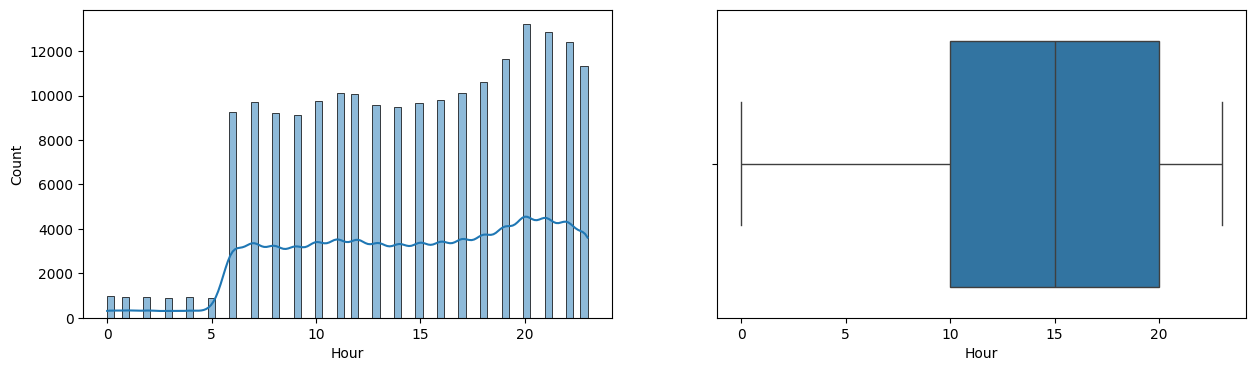

date_id
Skew: 0.01
Kurtosis: -1.02


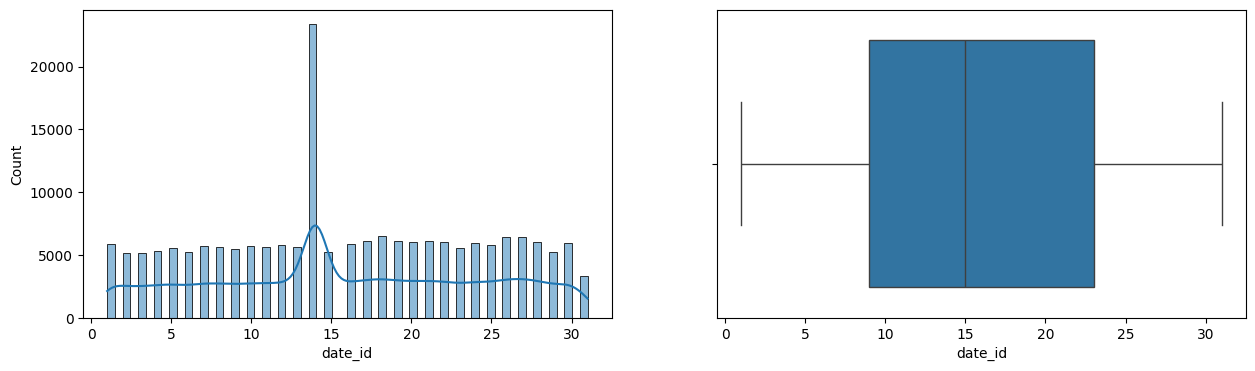

month_id
Skew: -1.36
Kurtosis: 0.33


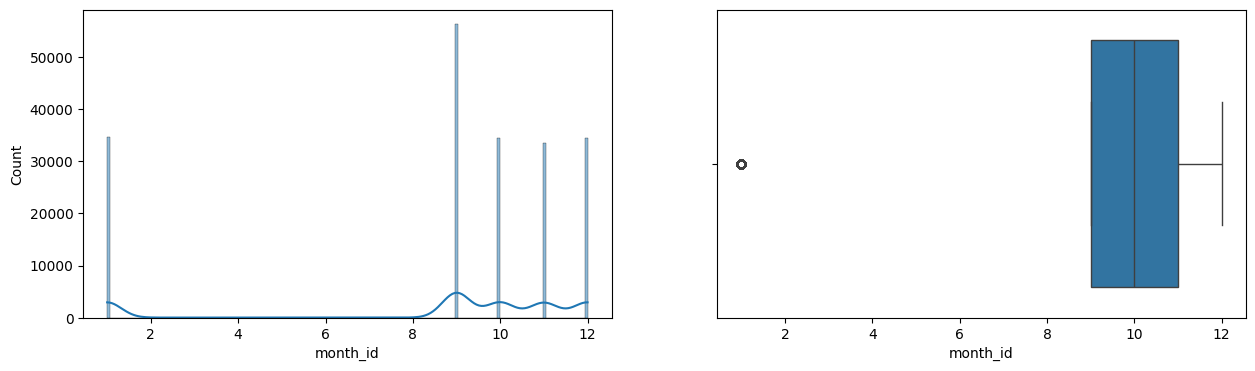

year_id
Skew: 1.67
Kurtosis: 0.79


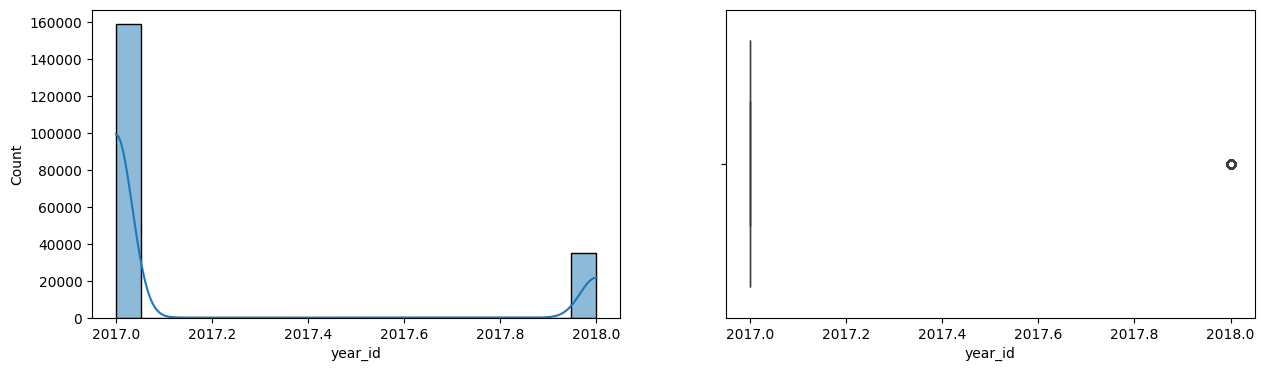

weekday
Skew: 0.01
Kurtosis: -1.09


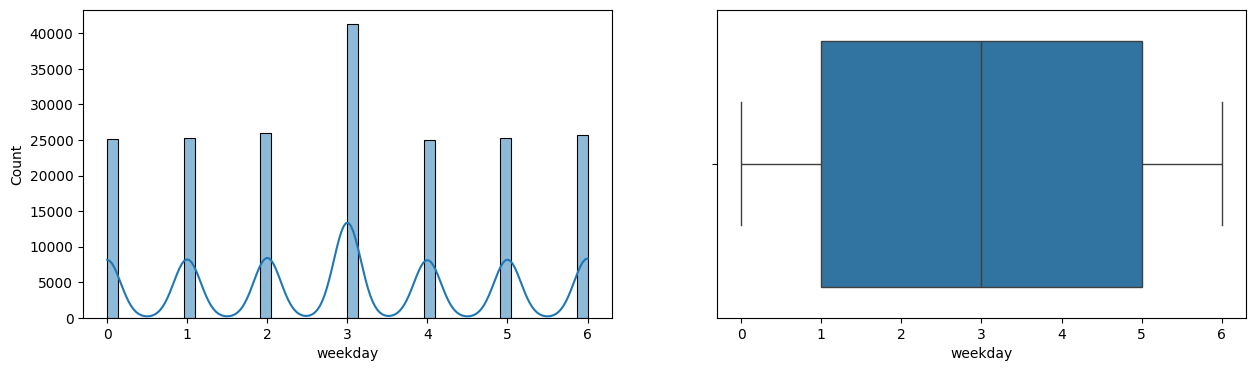

In [100]:
for col in num_cols:
  print(col)
  print('Skew:', round(df_ac_log[col].skew(),2))
  print('Kurtosis:', round(df_ac_log[col].kurtosis(),2))

  plt.figure(figsize=(15,4))
  plt.subplot(1,2,1)
  sns.histplot(data=df_ac_log, x=col, kde=True)
  plt.subplot(1,2,2)
  sns.boxplot(data=df_ac_log, x=col)
  plt.show()




The month value is left skewed, the access traffic spikes during mid of the week and mid of the month.

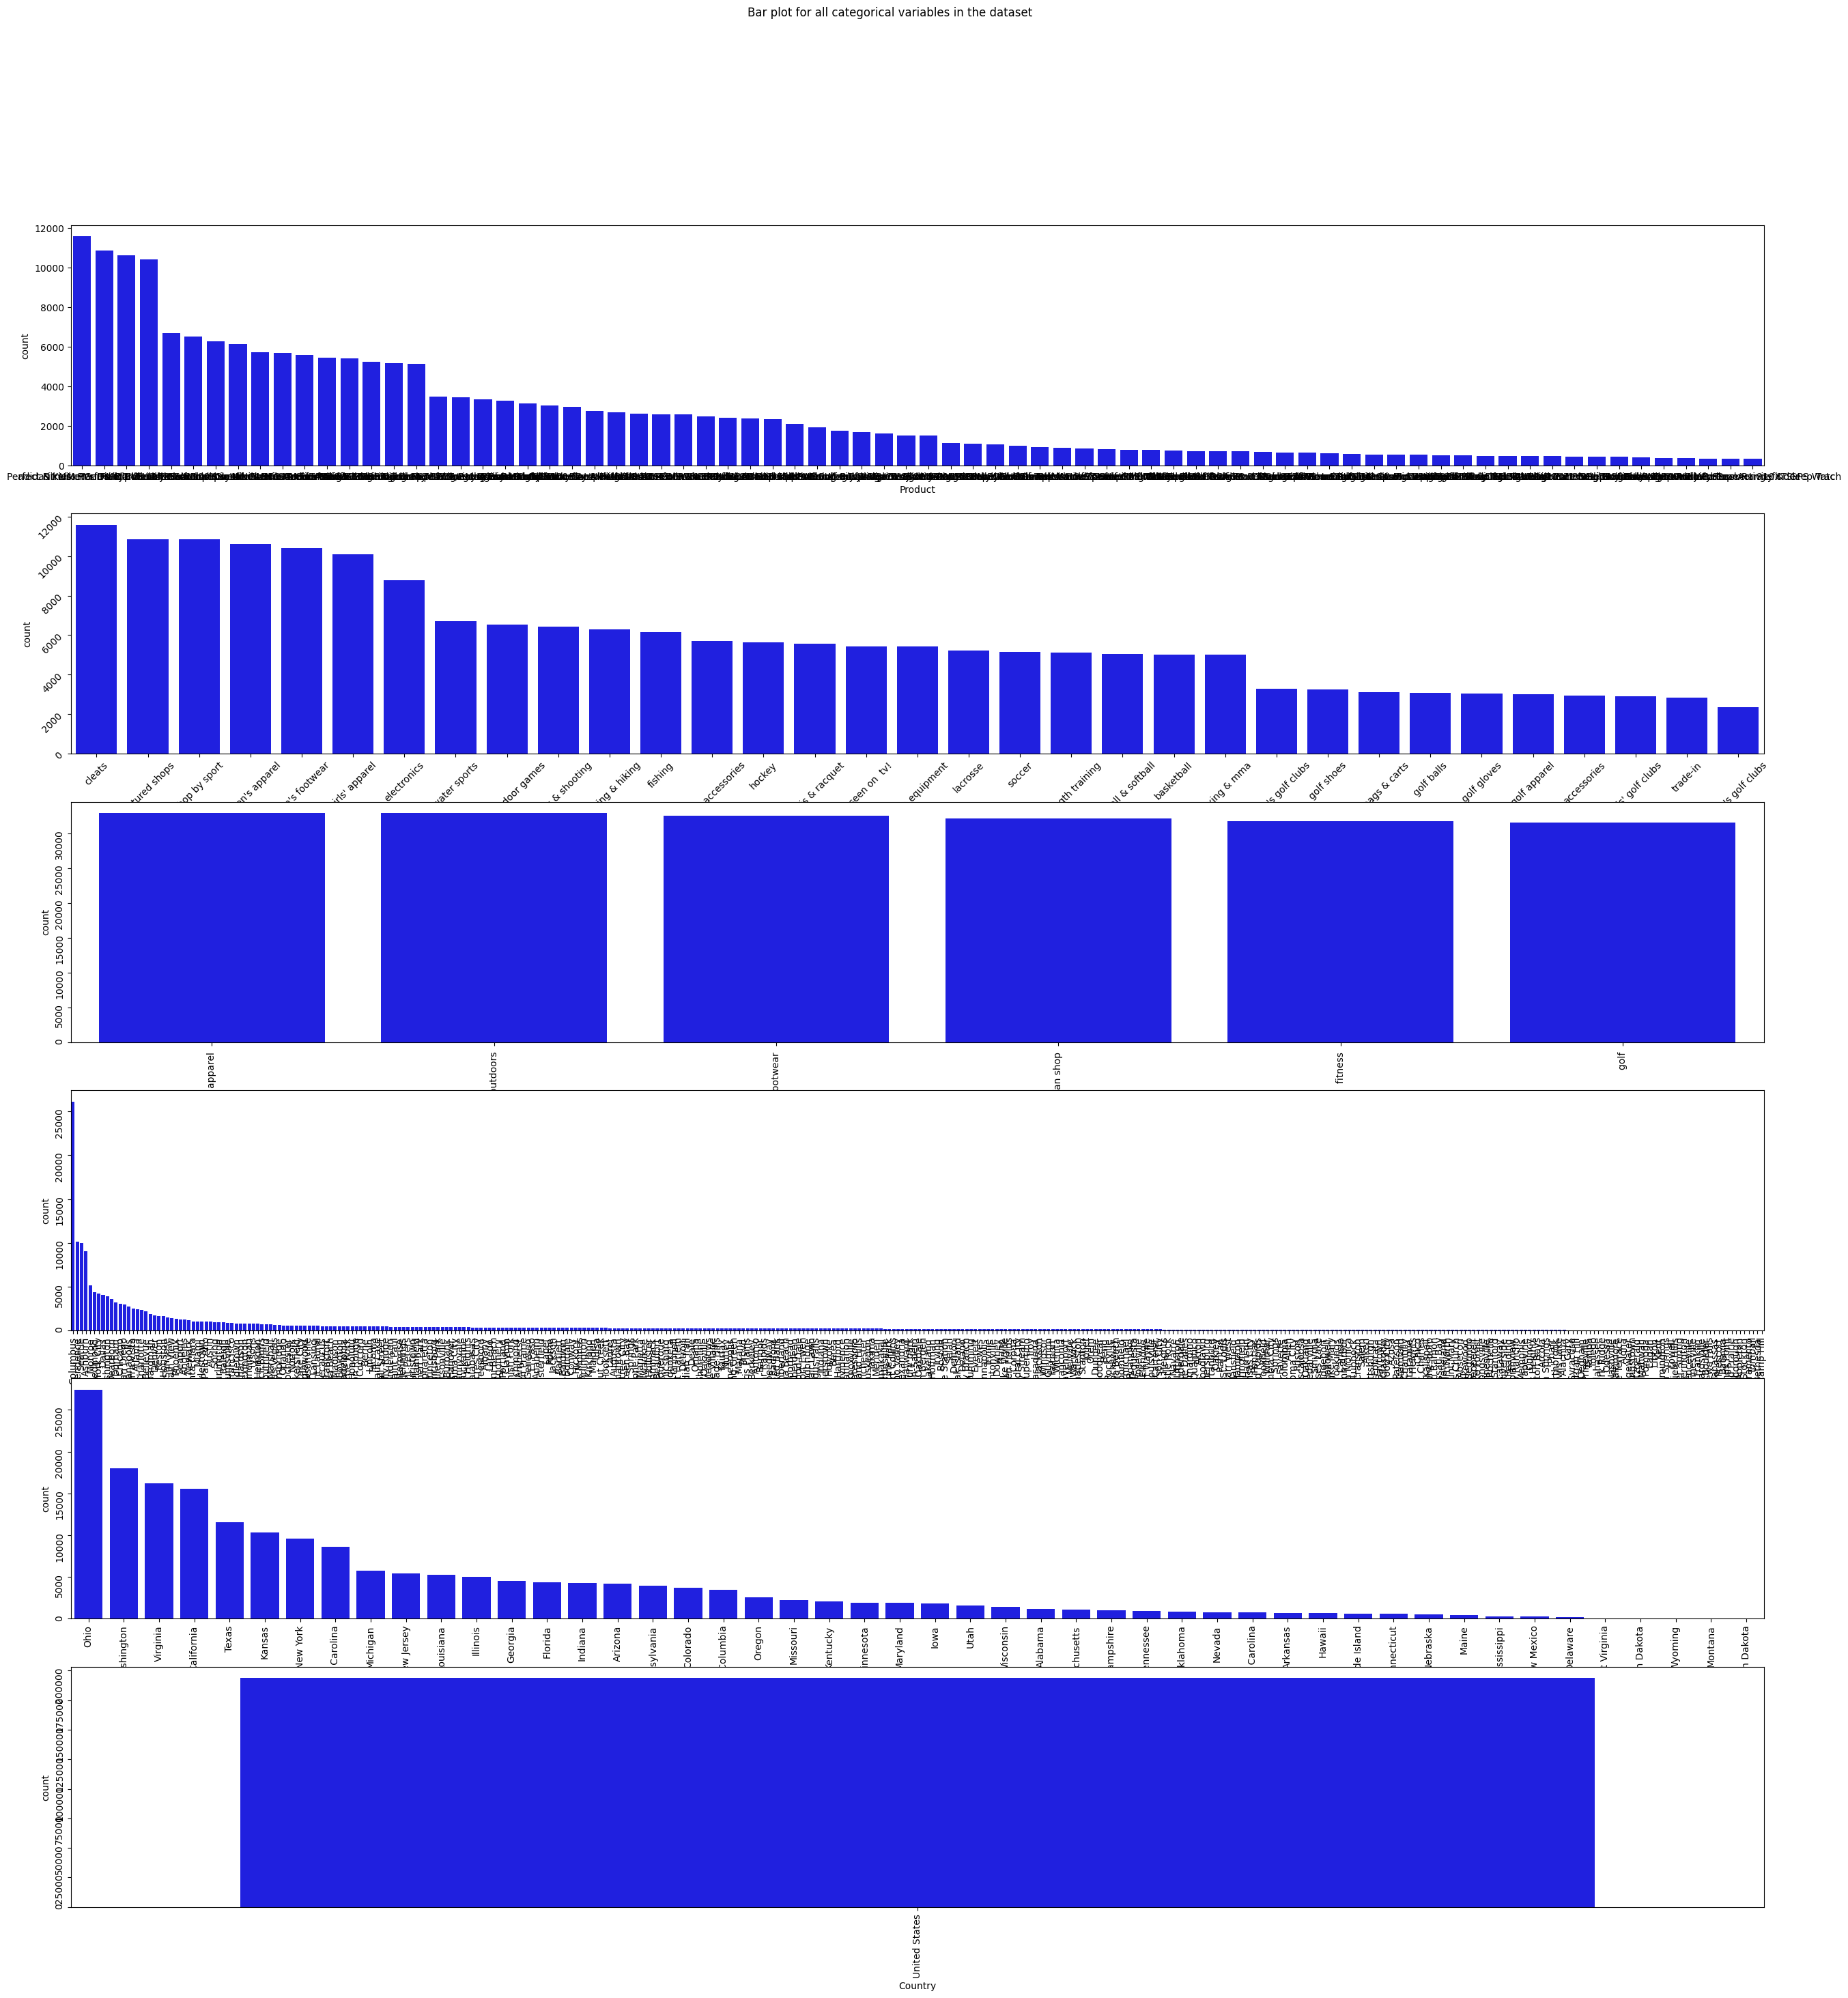

In [101]:
fig, axes = plt.subplots(6,1, figsize=(32,32))
fig.suptitle('Bar plot for all categorical variables in the dataset')

sns.countplot(ax = axes[0], x = 'Product', data = df_ac_log, color='blue',
              order=df_ac_log['Product'].value_counts().index);
sns.countplot(ax = axes[1], x = 'Category', data = df_ac_log, color='blue',
              order=df_ac_log['Category'].value_counts().index);
sns.countplot(ax = axes[2], x = 'Department', data = df_ac_log, color='blue',
              order=df_ac_log['Department'].value_counts().index);
sns.countplot(ax = axes[3], x = 'City', data = df_ac_log, color='blue',
              order=df_ac_log['City'].value_counts().index);
sns.countplot(ax = axes[4], x = 'State', data = df_ac_log, color='blue',
              order=df_ac_log['State'].value_counts().index);
sns.countplot(ax = axes[5], x = 'Country', data = df_ac_log, color='blue',
              order=df_ac_log['Country'].value_counts().index);

axes[1].tick_params(labelrotation=45);
axes[2].tick_params(labelrotation=90);
axes[3].tick_params(labelrotation=90);

axes[4].tick_params(labelrotation=90);
axes[5].tick_params(labelrotation=90);
plt.show()



Looking at the chart above, Product Category, Department, State are relatively fewer unique values, so worth looking into further.

**Data Transformation**


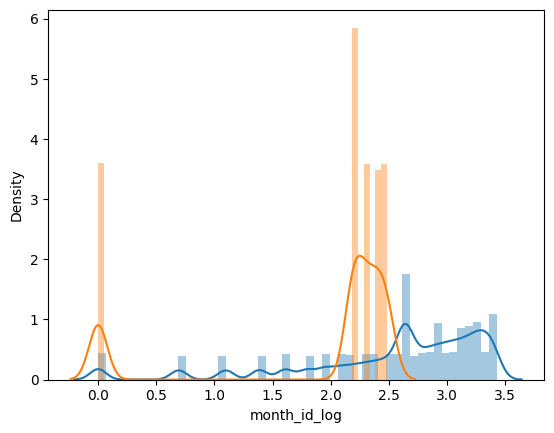

In [102]:
## 'Hour', 'date_id', 'month_id', 'year_id', 'weekday'
## The numerical values are skewed, log transformation can help in normalization

# Function for log transformation of the column
def log_transform(data, col):
  for colname in col:
    if (data[colname] == 1.0).all():
      data[colname + '_log'] = np.log(data[colname] + 1)
    else:
      data[colname + '_log'] = np.log(data[colname])
  #data.info()

log_transform(df_ac_log, ['Hour', 'date_id', 'month_id', 'weekday'])


# Replacing inf with a large finite value and -inf with a small finite value
df_ac_log.replace([np.inf, -np.inf], [np.finfo(np.float64).max, np.finfo(np.float64).min], inplace=True)


#Log transformation of the features
#sns.distplot(df_ac_log['Hour_log'], axlabel='Hour_log')
sns.distplot(df_ac_log['date_id_log'], axlabel='date_id_log')
sns.distplot(df_ac_log['month_id_log'], axlabel='month_id_log')
#sns.distplot(df_ac_log['weekday_log'], axlabel='weekday_log')
plt.show()

**Encoding the categorical variables**

Unique Elements in Categorical Columns

In [103]:
print(len(df_ac_log))

193571


In [104]:
df_ac_US_log= df_ac_log

In [105]:
"""
print('Product: ' + df_ac_US_log['Product'].unique())
print('Category: ' + df_ac_US_log['Category'].unique())
print('Department: ' + df_ac_US_log['Department'].unique())
print('City: ' + df_ac_US_log['City'].unique())
print('State: ' + df_ac_US_log['State'].unique())
print('Country: ' + df_ac_US_log['Country'].unique())
"""


"\nprint('Product: ' + df_ac_US_log['Product'].unique())\nprint('Category: ' + df_ac_US_log['Category'].unique())\nprint('Department: ' + df_ac_US_log['Department'].unique())\nprint('City: ' + df_ac_US_log['City'].unique())\nprint('State: ' + df_ac_US_log['State'].unique())\nprint('Country: ' + df_ac_US_log['Country'].unique())\n"

In [106]:
df_ac_US_log['ip'].value_counts()

,count
ip,
157.21.93.193,566
69.214.176.127,493
199.52.45.6,486
67.207.55.106,486
140.34.153.203,485
...,...
204.245.223.180,2
108.81.38.129,2
128.231.51.193,2


In [107]:
#
# Access Log of Top 5 IP address to be selected

top_ips = df_ac_US_log['ip'].value_counts().head(5)

#print(top_ips.index.tolist())

df_top_ip_access = df_ac_US_log[df_ac_US_log.ip.isin(top_ips.index.tolist())]

#df_top_ip_access.head(10)


Top 5 IP address access breakdown by date and the buying intent

In [108]:
print(len(df_top_ip_access))
df_top_ip_access.info()

2516
<class 'pandas.core.frame.DataFrame'>
Index: 2516 entries, 294 to 192552
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Product       2516 non-null   object        
 1   Category      2516 non-null   object        
 2   Date          2516 non-null   object        
 3   Month         2516 non-null   object        
 4   Hour          2516 non-null   int64         
 5   Department    2516 non-null   object        
 6   ip            2516 non-null   object        
 7   url           2516 non-null   object        
 8   City          2516 non-null   object        
 9   Country       2516 non-null   object        
 10  State         2516 non-null   object        
 11  Country_Code  2516 non-null   object        
 12  State_Code    2516 non-null   object        
 13  date_id       2516 non-null   int64         
 14  month_id      2516 non-null   int64         
 15  year_id       2516 non-null   int6

In [109]:
#df_top_ip_access.value_counts(['ip', 'date','AddToCart'])


In [110]:
df_top_ip_access['Product'].value_counts()

,count
Product,
adidas Kids' RG III Mid Football Cleat,167
Nike Men's Dri-FIT Victory Golf Polo,150
Perfect Fitness Perfect Rip Deck,146
Nike Men's CJ Elite 2 TD Football Cleat,141
Field & Stream Sportsman 16 Gun Fire Safe,96
...,...
Mio ALPHA Heart Rate Monitor/Sport Watch,3
Titleist Pro V1x High Numbers Golf Balls,2
Bridgestone e6 Straight Distance NFL Tennesse,2


In [111]:
df_ac_US_log['Department'].value_counts()


,count
Department,
apparel,32867
outdoors,32857
footwear,32502
fan shop,32098
fitness,31684
golf,31563


In [148]:
#df_ac_US_log['State'].value_counts()

print(min(df_ac_US_log['Dt']))
print(max(df_ac_US_log['Dt']))

1/1/2018
9/9/2017


As there are a lot of categorical columns with many uniques values, let's subset the dataframe

In [113]:
df_ac_cat_subset = df_ac_US_log[["Department", "Dt", "State"]]

In [114]:
df_ac_cat_subset['Dt'].value_counts()

,count
Dt,
9/14/2017,18958
9/27/2017,1700
9/26/2017,1613
9/20/2017,1610
9/18/2017,1575
...,...
9/11/2017,949
1/29/2018,940
11/29/2017,940


In [115]:
print(len(df_ac_cat_subset))

193571


In [116]:
#one hot encoding using OneHotEncoder of Scikit-Learn

from sklearn.preprocessing import OneHotEncoder


#Extract categorical columns from the dataframe
#Here we extract the columns with object datatype as they are the categorical columns
categorical_columns = df_ac_cat_subset.select_dtypes(include=['object']).columns.tolist()

#Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Apply one-hot encoding to the categorical columns
one_hot_encoded = encoder.fit_transform(df_ac_cat_subset[categorical_columns])

#Create a DataFrame with the one-hot encoded columns
#We use get_feature_names_out() to get the column names for the encoded data
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the one-hot encoded dataframe with the original dataframe
df_encoded = pd.concat([df_ac_cat_subset, one_hot_df], axis=1)

# Drop the original categorical columns
df_encoded = df_encoded.drop(categorical_columns, axis=1)

# Display the resulting dataframe
print(f"Encoded data : \n{df_encoded}")


Encoded data : 
        Department_apparel   Department_fan shop   Department_fitness   \
0                       1.0                   0.0                  0.0   
1                       0.0                   0.0                  0.0   
2                       0.0                   1.0                  0.0   
3                       0.0                   0.0                  1.0   
4                       0.0                   0.0                  0.0   
...                     ...                   ...                  ...   
193566                  0.0                   1.0                  0.0   
193567                  0.0                   0.0                  0.0   
193568                  0.0                   0.0                  0.0   
193569                  0.0                   0.0                  0.0   
193570                  0.0                   0.0                  0.0   

        Department_footwear   Department_golf   Department_outdoors   \
0                      

**Tabular data -> Heterogeneous Graph Data**

Identify:
Nodes (Product, User, Location ...)
Edges (Interactions)
Node features(Attributes)
Label (Node level, Edge level, Graph level)
Timesteps (Interval time)
Temporal graph shape: static or dynamic? What is changing over time?


Identifying buying intent in the access log by searching for 'add_to_cart' related url links. This will be an edge feature in the graph.

In [117]:
df_top_ip_access["AddToCart"] = df_top_ip_access["url"].str.contains("add_to_cart").astype(int) # str.extract("(add_to_cart)")
#df_top_ip_access.head()

In [118]:
# Let's take a subset of the dataframe with IP's with most access to the website df_top_ip_access

#df_top_ip_access.head()


In [119]:
# Reassign the IP address to IDs (make it easier later for creating edges)

ipaddrs = df_top_ip_access['ip'].unique()
new_ip_ids = list(range(len(df_top_ip_access['ip'].unique())))
map_ip = dict(zip(ipaddrs, new_ip_ids))
print(type(map_ip))

df_top_ip_access['ip_id'] = df_top_ip_access['ip'].map(map_ip)

#df_top_ip_access.head()

<class 'dict'>


In [120]:
# Reassign the Product to IDs (make it easier later for creating edges)

products = df_top_ip_access['Product'].unique()
new_prod_ids = list(range(len(df_top_ip_access['Product'].unique())))
map_prod = dict(zip(products, new_prod_ids))
print(type(map_prod))

df_top_ip_access['Product_Id'] = df_top_ip_access['Product'].map(map_prod)

df_top_ip_access.head()

<class 'dict'>


,Product,Category,Date,Month,Hour,Department,ip,url,City,Country,...,date,day_of_week,weekday,Hour_log,date_id_log,month_id_log,weekday_log,AddToCart,ip_id,Product_Id
294,Stiga Master Series ST3100 Competition Indoor,hockey,9/1/2017 11:07,Sep,11,fitness,199.52.45.6,/department/fitness/category/hockey/product/St...,New York City,United States,...,2017-09-01,Friday,4,2.397895,0.0,2.197225,1.386294,1,0,0
299,Perfect Fitness Perfect Rip Deck,cleats,9/1/2017 11:19,Sep,11,apparel,199.52.45.6,/department/apparel/category/cleats/product/Pe...,New York City,United States,...,2017-09-01,Friday,4,2.397895,0.0,2.197225,1.386294,1,0,1
301,Nike Men's Dri-FIT Victory Golf Polo,women's apparel,9/1/2017 11:20,Sep,11,golf,199.52.45.6,/department/golf/category/women's%20apparel/pr...,New York City,United States,...,2017-09-01,Friday,4,2.397895,0.0,2.197225,1.386294,0,0,2
305,Glove It Urban Brick Golf Towel,trade-in,9/1/2017 11:27,Sep,11,outdoors,199.52.45.6,/department/outdoors/category/trade-in/product...,New York City,United States,...,2017-09-01,Friday,4,2.397895,0.0,2.197225,1.386294,0,0,3
311,Perfect Fitness Perfect Rip Deck,cleats,9/1/2017 11:36,Sep,11,apparel,199.52.45.6,/department/apparel/category/cleats/product/Pe...,New York City,United States,...,2017-09-01,Friday,4,2.397895,0.0,2.197225,1.386294,0,0,1


In [121]:
#df_top_ip_access.info()

**Based on the dataset, this will be a Heterogenous Graph comprising of Users(IP address) nodes and Product nodes, the edges will be represented as the buy intend (add_to_cart attribute)**



In [122]:
#Let's start with the Product Node, create a subset dataframe.
#It will have Product_Id, Category, Department, url

df_product_nodes = df_top_ip_access[['Product_Id', 'Category']] #, 'Department', 'url']]
df_product_nodes.head()

,Product_Id,Category
294,0,hockey
299,1,cleats
301,2,women's apparel
305,3,trade-in
311,1,cleats


In [123]:
# select Product node features
df_product_nodes = df_product_nodes.drop_duplicates()

df_product_nodes = df_product_nodes.reset_index(drop=True)
df_product_nodes.head()
print(len(df_product_nodes))




76


In [124]:
# Create a dictionary to store node features
node_features = {}

# Iterate through the rows of the dataframe
for index, row in df_product_nodes.iterrows():
    # Get the product ID
    product_id = row['Product_Id']
    # Create a feature vector for the node
    features = {
        'Category': row['Category']
    }
    # Store the feature vector in the dictionary
    node_features[product_id] = features

# Print the node features
#print(node_features)

# Access the features for a specific product ID
print(node_features[1])



{'Category': 'cleats'}


In [125]:
#one hot encoding the node feature using OneHotEncoder of Scikit-Learn

from sklearn.preprocessing import OneHotEncoder


#Extract categorical columns from the dataframe
#Here we extract the columns with object datatype as they are the categorical columns
categorical_columns = df_product_nodes.select_dtypes(include=['object']).columns.tolist()

#Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Apply one-hot encoding to the categorical columns
one_hot_encoded = encoder.fit_transform(df_product_nodes[categorical_columns])

#Create a DataFrame with the one-hot encoded columns
#We use get_feature_names_out() to get the column names for the encoded data
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the one-hot encoded dataframe with the original dataframe
df_encoded = pd.concat([df_product_nodes, one_hot_df], axis=1)

# Drop the original categorical columns
df_product_features = df_encoded.drop(categorical_columns, axis=1)

# Display the resulting dataframe
print(f"Encoded data : \n{df_product_features}")


Encoded data : 
    Product_Id  Category_accessories  Category_as seen on  tv!  \
0            0                   0.0                       0.0   
1            1                   0.0                       0.0   
2            2                   0.0                       0.0   
3            3                   0.0                       0.0   
4            4                   1.0                       0.0   
..         ...                   ...                       ...   
71          71                   0.0                       0.0   
72          72                   0.0                       0.0   
73          73                   0.0                       0.0   
74          74                   0.0                       0.0   
75          75                   0.0                       0.0   

    Category_baseball & softball  Category_basketball  Category_boxing & mma  \
0                            0.0                  0.0                    0.0   
1                            0.

In [126]:
df_product_features.head()

,Product_Id,Category_accessories,Category_as seen on tv!,Category_baseball & softball,Category_basketball,Category_boxing & mma,Category_camping & hiking,Category_cardio equipment,Category_cleats,Category_electronics,...,Category_men's footwear,Category_men's golf clubs,Category_shop by sport,Category_soccer,Category_strength training,Category_tennis & racquet,Category_trade-in,Category_water sports,Category_women's apparel,Category_women's golf clubs
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [127]:
# Convert to numpy
x = df_product_features.to_numpy()
print(x)
print(x.shape)

[[ 0.  0.  0. ...  0.  0.  0.]
 [ 1.  0.  0. ...  0.  0.  0.]
 [ 2.  0.  0. ...  0.  1.  0.]
 ...
 [73.  0.  0. ...  0.  0.  0.]
 [74.  0.  0. ...  0.  0.  0.]
 [75.  0.  0. ...  0.  0.  0.]]
(76, 34)


**Create User Node and Features**

In [128]:
#Let's create the User Node, create a subset dataframe.
# User features can be their access count and buy intend count

access_count = df_top_ip_access.groupby("ip_id")["date_id"].count().rename("access_count")
buy_count = df_top_ip_access[df_top_ip_access["AddToCart"] == 1].groupby("ip_id")["AddToCart"].count().rename("buy_count")
user_node_features = pd.concat([access_count, buy_count], axis=1)

# Remap user ID
user_node_features = user_node_features.reset_index(drop=False)
user_node_features.head()
user_id_mapping = user_node_features['ip_id']

# Only keep user features
user_node_features = user_node_features.drop('ip_id', axis=1)
user_node_features.head()



,access_count,buy_count
0,486,158
1,485,133
2,566,156
3,486,143
4,493,176


In [129]:
user_id_mapping.head()

,ip_id
0,0
1,1
2,2
3,3
4,4


In [130]:
# Convert to numpy
x = user_node_features.to_numpy()
print(x)
print(x.shape)

[[486 158]
 [485 133]
 [566 156]
 [486 143]
 [493 176]]
(5, 2)


<Axes: >

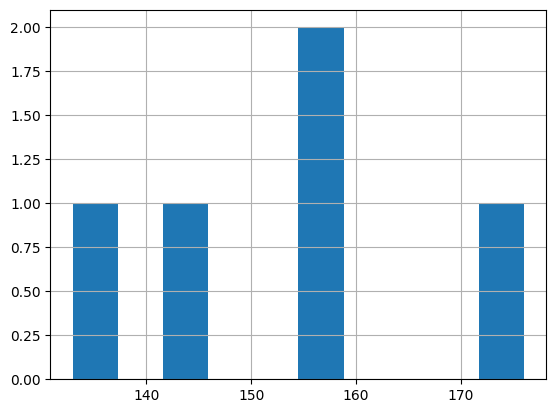

In [131]:
user_node_features["buy_count"].hist()

Creating the Edge index

In [132]:
!pip install torch # Install the PyTorch library
import torch # Import the torch module

## edge_index where AddToCart == 1
df_buy_edge= df_top_ip_access[df_top_ip_access["AddToCart"] == 1]
df_buy_edge.head()

edge_index = df_buy_edge[["ip_id", "Product_Id"]].values.transpose()
edge_index = torch.tensor(edge_index, dtype=torch.long)
print(edge_index)
print(edge_index.shape)

tensor([[ 0,  0,  0,  ...,  4,  3,  4],
        [ 0,  1,  4,  ..., 24, 49, 14]])
torch.Size([2, 766])


**Build the Heterogeneous graph data object**

In [133]:
!pip install torch_geometric

from torch_geometric.data import HeteroData

data = HeteroData()

# Set the number of nodes for 'user' and 'product'
data['user'].num_nodes = len(user_node_features) # Assuming user_node_features is a list or array of user features
data['product'].num_nodes = len(df_product_features) # Assuming df_product_features is a DataFrame or array of product features


data['user'].x = user_node_features
data['product'].x = df_product_features
data['user', 'buy', 'product'].edge_index = edge_index

clear_output = True


In [134]:
print(type(data))
print(data)

<class 'torch_geometric.data.hetero_data.HeteroData'>
HeteroData(
  user={
    num_nodes=5,
    x=   access_count  buy_count
0           486        158
1           485        133
2           566        156
3           486        143
4           493        176,
  },
  product={
    num_nodes=76,
    x=    Product_Id  Category_accessories  Category_as seen on  tv!  \
0            0                   0.0                       0.0   
1            1                   0.0                       0.0   
2            2                   0.0                       0.0   
3            3                   0.0                       0.0   
4            4                   1.0                       0.0   
..         ...                   ...                       ...   
71          71                   0.0                       0.0   
72          72                   0.0                       0.0   
73          73                   0.0                       0.0   
74          74                   0.0  

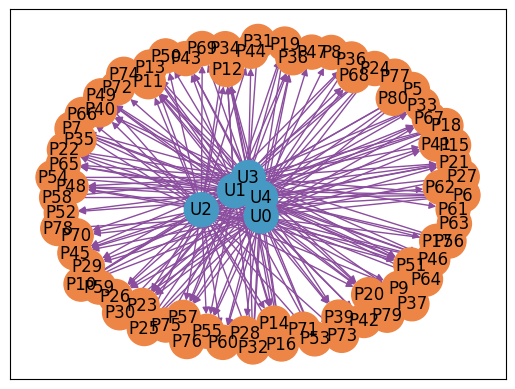

In [135]:
### Visualize using NetworkX

# Simple example of network x rendering with colored nodes and edges
import matplotlib.pyplot as plt
import networkx as nx
from torch_geometric.utils import to_networkx

graph = to_networkx(data)

# Define colors for nodes and edges
node_type_colors = {
    "user": "#4599C3",
    "product": "#ED8546",
}

node_colors = []
labels = {}
for node, attrs in graph.nodes(data=True):
    node_type = attrs["type"]
    color = node_type_colors[node_type]
    node_colors.append(color)
    if attrs["type"] == "user":
        labels[node] = f"U{node}"
    elif attrs["type"] == "product":
        labels[node] = f"P{node}"

# Define colors for the edges
edge_type_colors = {
    ("user", "buy", "product"): "#8B4D9E",
    ("user", "view", "product"): "#DFB825",
}

edge_colors = []
for from_node, to_node, attrs in graph.edges(data=True):
    edge_type = attrs["type"]
    color = edge_type_colors[edge_type]

    graph.edges[from_node, to_node]["color"] = color
    edge_colors.append(color)


# Draw the graph
pos = nx.spring_layout(graph, k=2)
nx.draw_networkx(
    graph,
    pos=pos,
    labels=labels,
    with_labels=True,
    node_color=node_colors,
    edge_color=edge_colors,
    node_size=600,
)
plt.show()

**Measuring parameters in a PyTorch Geometric (PyG) HeteroData graph**

In [136]:
import torch
import torch.nn as nn
from torch_geometric.nn import SAGEConv, HeteroConv

def count_parameters(model):
    """Counts the total number of trainable parameters in a PyTorch model.
    """
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

class HeteroGNN(nn.Module):
    def __init__(self, data):
        super().__init__()
        self.convs = nn.ModuleDict()
        # Create a mapping from node type names to numerical indices
        self.node_type_to_index = {node_type: i for i, node_type in enumerate(data.node_types)}

        for edge_type in data.edge_types:
            src_node_type, _, dst_node_type = edge_type
            # Convert edge_type to a string
            edge_type_str = ':'.join(edge_type)
            # Use numerical indices for in_channels
            self.convs[edge_type_str] = SAGEConv(
                in_channels={self.node_type_to_index[src_node_type]: data[src_node_type].x.shape[1],
                             self.node_type_to_index[dst_node_type]: data[dst_node_type].x.shape[1]},
                out_channels=64
            )

    def forward(self, data):
        x_dict = data.x_dict
        for edge_type, conv in self.convs.items():
            # Convert edge_type string back to tuple for data access
            edge_type_tuple = tuple(edge_type.split(':'))
            x_dict = conv(x_dict, data[edge_type_tuple].edge_index)
        return x_dict

#data = ...  # Your HeteroData object
model = HeteroGNN(data)

# Count parameters
# Assuming you have a function 'count_parameters' defined
total_params = count_parameters(model)
print(f"Total parameters: {total_params}")


# Iterate Over Edge Types
for edge_type in data.edge_types:
    # Access edge features for this type
    edge_index = data[edge_type].edge_index

    # Check if edge attributes exist before accessing them
    if 'edge_attr' in data[edge_type]:  # Check if edge_attr is present
        edge_features = data[edge_type].edge_attr
        print(f"Edge features for {edge_type}: {edge_features.shape}")
    else:
        print(f"No edge features found for {edge_type}")

    print(f"Edge index for {edge_type}: {edge_index.shape}")

Total parameters: 2368
No edge features found for ('user', 'buy', 'product')
Edge index for ('user', 'buy', 'product'): torch.Size([2, 766])


# **Now our tabular data is ready to be used for Heterogenous Link-level GNN processing.**

**Preparing Data to create the  Heterogeneous Temporal Graph**

In [137]:
# Order by date
df_top_ip_access = df_top_ip_access.sort_values(by='date')

# max date
max_date = df_top_ip_access['date'].max()
print('Max date: ' + str(max_date))

#min date
min_date = df_top_ip_access['date'].min()
print('Min date: ' + str(min_date))

Max date: 2018-01-30 00:00:00
Min date: 2017-09-01 00:00:00


<class 'pandas.core.series.Series'>
[56, 17, 55, 12, 55, 13, 40, 2, 0, 27, 46, 0, 103, 18, 59, 0, 0, 0, 0, 0, 16, 76, 1, 0, 0, 11, 77, 5, 0, 57, 33, 10, 33, 49, 38, 8, 72, 0, 0, 0, 0, 2, 45, 19, 0, 0, 0, 35, 26, 0, 12, 66, 3, 0, 0, 0, 0, 15, 65, 4, 0, 25, 68, 0, 0, 0, 0, 0, 14, 60, 0, 0, 0, 9, 55, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 41, 42, 57, 33, 10, 33, 49, 38, 8, 72, 0, 0, 0, 0, 2, 42, 19, 0, 0, 0, 35, 26, 0, 12, 66, 3, 0, 0, 0, 0, 15, 65, 0, 0, 25, 68, 0, 0, 0, 0, 0, 14, 60, 0, 0, 0, 9, 55, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 41, 42, 0]


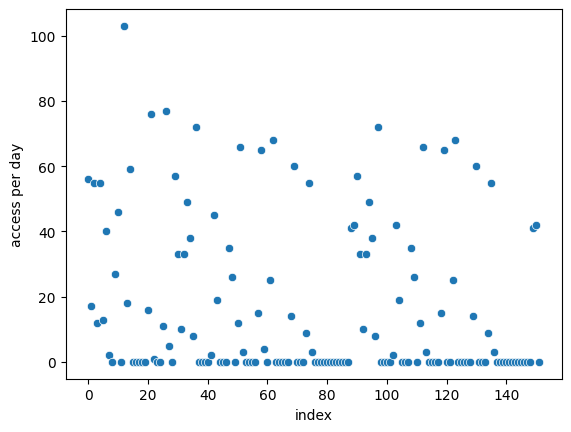

In [138]:
# Split the data into daily access buckets
from datetime import datetime, timedelta
print(type(df_top_ip_access['date']))
df_top_ip_access['date']= pd.to_datetime(df_top_ip_access['date'])

start_date = pd.to_datetime(min_date)
end_date = pd.to_datetime(max_date)

interval = timedelta(days=1)
bucket_elements=[]

while start_date <= end_date:
  bucket_elements.append(df_top_ip_access[(start_date + interval) == df_top_ip_access["date"]].shape[0])
  start_date += interval

print(bucket_elements)

sns.scatterplot(x="index", y="access per day", data=pd.DataFrame(bucket_elements, columns=["access per day"]).reset_index())
plt.show()



In [139]:
#df_top_ip_access.head()

In [140]:
# Merge date and ip columns to create new column in df_top_ip_access
df_top_ip_access['date_ip'] = df_top_ip_access['date'].astype(str) + '_' + df_top_ip_access['ip'].astype(str)
#df_top_ip_access.head()

In [141]:
# Split the dataframe by date and ip address simulating temporal behaviour of the users on the website

def split_dataframe_by_column(df, column_name):
    """Splits a DataFrame into an array of DataFrames based on the unique values in a specified column.

    Args:
        df: The DataFrame to split.
        column_name: The name of the column to split by.

    Returns:
        A list of DataFrames.
    """

    dataframes = []
    for value in df[column_name].unique():
        dataframes.append(df[df[column_name] == value])
    return dataframes

split_dfs = split_dataframe_by_column(df_top_ip_access, 'date_ip')
print(len(split_dfs))
#print(split_dfs[1].info())

199


We have now split the dataset into user session datasets.

Let's calculate the average user request duration by session, # of requests per session, entry Product, exit Product, is Exit a buy etc.

In [144]:
temp_dataframes = []

# Iterate the Split_df list
for i in range(len(split_dfs)):
#for i in range(1,2):

  split_dfs[i] = split_dfs[i].sort_values(by='time')
  # Convert 'time' column to datetime objects
  split_dfs[i]['time'] = pd.to_datetime(split_dfs[i]['time'])
  split_dfs[i]['avg_req_duration'] = (max(split_dfs[i]['time']) - min(split_dfs[i]['time'])) / len(split_dfs[i])
  split_dfs[i]['num_requests'] = len(split_dfs[i])
  split_dfs[i]['exit_product_id'] = split_dfs[i]['Product_Id'].tail(1).values[0]
  split_dfs[i]['exit_buy'] = split_dfs[i]['AddToCart'].tail(1).values[0]
  split_dfs[i]['entry_product_id'] = split_dfs[i]['Product_Id'].head(1).values[0]
  split_dfs[i]['entry_buy'] = split_dfs[i]['AddToCart'].head(1).values[0]

  #### Let's start with the Product Node, create a subset dataframe.
  # It will have Product_Id, Category, Department, url
  df_temp_product_nodes = split_dfs[i][['Product_Id', 'Category']]
  df_temp_product_nodes = df_temp_product_nodes.drop_duplicates()
  df_temp_product_nodes = df_temp_product_nodes.reset_index(drop=True)
  print(df_temp_product_nodes)

  # Filter df_product_features by Product_Id
  df_temp_product_features = df_product_features[df_product_features['Product_Id'].isin(df_temp_product_nodes['Product_Id'])]
  print(df_temp_product_features)

  # Create the user node and features
  df_temp_user_node = split_dfs[i][['ip_id']]
  df_temp_user_node = df_temp_user_node.drop_duplicates()
  df_temp_user_node = df_temp_user_node.reset_index(drop=True)
  print("!!!!")
  print(df_temp_user_node)


  avg_req_duration = split_dfs[i]['avg_req_duration'].mean()
  num_requests = split_dfs[i]['num_requests'].mean()
  exit_product_id = split_dfs[i]['exit_product_id'].mean()

  # Convert avg_req_duration to a numeric representation before concatenation
  avg_req_duration_seconds = avg_req_duration.total_seconds()

  # Create a DataFrame from the individual features
  df_temp_user_features = pd.DataFrame({
    'avg_req_duration': [avg_req_duration_seconds],
    'num_requests': [num_requests],
    'exit_product_id': [exit_product_id]
  })
  print(df_temp_user_features)


  # Edge / edge index
  temp_edge_index = split_dfs[i][["ip_id", "Product_Id"]].values.transpose()
  temp_edge_index = torch.tensor(temp_edge_index, dtype=torch.long)
  print(temp_edge_index)
  print(temp_edge_index.shape)


  ##### Build the dataset
  temp_data = HeteroData()

  # Set the number of nodes for 'user' and 'product'
  temp_data['user'].num_nodes = len(df_temp_user_features) # Assuming user_node_features is a list or array of user features
  temp_data['user'].id = df_temp_user_node['ip_id']
  temp_data['product'].num_nodes = len(df_temp_product_features) # Assuming df_product_features is a DataFrame or array of product features

  temp_data['user'].x = df_temp_user_features
  temp_data['product'].x = df_temp_product_features
  temp_data['user', 'view', 'product'].edge_index = temp_edge_index

  print(temp_data)
  print("~~~~")















Streaming output truncated to the last 5000 lines.
2                            0.0                  0.0                    0.0   
5                            0.0                  0.0                    0.0   
7                            0.0                  0.0                    0.0   
8                            0.0                  0.0                    0.0   
12                           0.0                  0.0                    0.0   
15                           0.0                  0.0                    0.0   
16                           0.0                  0.0                    0.0   
46                           0.0                  0.0                    0.0   

    Category_camping & hiking  Category_cardio equipment  Category_cleats  \
1                         0.0                        0.0              1.0   
2                         0.0                        0.0              0.0   
5                         0.0                        0.0              0.0   


Convert the HeteroData object into NetworkX object to visualize the graphs

In [145]:
"""

###### Draw the graph
  graph = to_networkx(temp_data)  # Convert to undirected graph

  # Networkx seems to create extra nodes from our heterogeneous graph, so I remove them
  #isolated_nodes = [node for node in graph.nodes() if graph.out_degree(node) == 0]
  #[graph.remove_node(i_n) for i_n in isolated_nodes]

  print(graph.nodes(data=True))
  print(graph.edges(data=True))

  print(graph.number_of_edges())


  print("######")

  # Define colors for nodes and edges
  node_type_colors = {
      "user": "#4599C3",
      "product": "#ED8546",
  }

  node_colors = []
  labels = {}
  ###
  for node, attrs in graph.nodes(data=True):
    print(graph.out_degree(node))

    print(node)
    #print(attrs)
    #print(type(attrs))


    node_type = attrs.get("type")

    print(node_type)

  #  color = node_type_colors.get(node_type, 'gray') # Use get with default color
   # color = node_type_colors[node_type]
   # node_colors.append(color)
  #  if attrs.get("type") == "user":
   #     labels[node] = f"U{node}"
   # elif attrs.get("type") == "product":
    #    labels[node] = f"P{node}"


    # Instead of temp_data.node_type(node), check for node type based on node ID
    if node < temp_data['user'].num_nodes: # Assuming user nodes are numbered first
        node_type = "user"
    else:
        node_type = "product"

    color = node_type_colors.get(node_type, 'gray') # Use get with default color
    node_colors.append(color)
    if node_type == "user":
        labels[node] = f"U{node}"
    elif node_type == "product":
        labels[node] = f"P{node}"

  ###
  # Define colors for the edges
  edge_type_colors = {
      ("user", "buy", "product"): "#8B4D9E",
      ("user", "view", "product"): "#DFB825",
  }

  edge_colors = []
  for from_node, to_node, attrs in graph.edges(data=True):
      edge_type = attrs["type"]
      color = edge_type_colors[edge_type]

      graph.edges[from_node, to_node]["color"] = color
      edge_colors.append(color)


  # Draw the graph
  pos = nx.spring_layout(graph, k=2)
  nx.draw_networkx(
      graph,
      pos=pos,
      labels=labels,
      with_labels=True,
      node_color=node_colors,
      edge_color=edge_colors,
      node_size=600,
  )
  plt.show()
"""

'\n\n###### Draw the graph\n  graph = to_networkx(temp_data)  # Convert to undirected graph\n\n  # Networkx seems to create extra nodes from our heterogeneous graph, so I remove them\n  #isolated_nodes = [node for node in graph.nodes() if graph.out_degree(node) == 0]\n  #[graph.remove_node(i_n) for i_n in isolated_nodes]\n\n  print(graph.nodes(data=True))\n  print(graph.edges(data=True))\n   \n  print(graph.number_of_edges())\n  \n\n  print("######")\n\n  # Define colors for nodes and edges\n  node_type_colors = {\n      "user": "#4599C3",\n      "product": "#ED8546",\n  }\n\n  node_colors = []\n  labels = {}\n  ###\n  for node, attrs in graph.nodes(data=True):\n    print(graph.out_degree(node))\n    \n    print(node)\n    #print(attrs)\n    #print(type(attrs))\n\n\n    node_type = attrs.get("type")\n   \n    print(node_type)\n\n  #  color = node_type_colors.get(node_type, \'gray\') # Use get with default color\n   # color = node_type_colors[node_type]\n   # node_colors.append(color)\n

In [146]:
print(split_dfs[1])

                                         Product             Category  \
973     Mio ALPHA Heart Rate Monitor/Sport Watch     kids' golf clubs   
992  Under Armour Hustle Storm Medium Duffle Bag  fitness accessories   

               Date Month  Hour Department              ip  \
973  9/1/2017 23:04   Sep    23  outdoors   140.34.153.203   
992  9/1/2017 23:17   Sep    23  footwear   140.34.153.203   

                                                   url      City  \
973  /department/outdoors/category/kids'%20golf%20c...  Columbus   
992  /department/footwear/category/fitness%20access...  Columbus   

           Country  ... AddToCart ip_id Product_Id                    date_ip  \
973  United States  ...         0     1         10  2017-09-01_140.34.153.203   
992  United States  ...         1     1          9  2017-09-01_140.34.153.203   

     avg_req_duration  num_requests exit_product_id exit_buy entry_product_id  \
973   0 days 00:06:30             2               9        1   